In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### SGD multi
this function is suitable for any number of variables.

but the correction of df should be guaranteed.

There is only one sample.

In [2]:
def sgd_multi(df, w, lr=0.01, epochs=500):
    e = 0.0001
    
    seq_w = []
    for i in range(len(w)):
        seq_w.append([])
        
    w_next = w - lr * df(w)
    for l in range(len(w)):
        seq_w[l].append(w_next[l])
        
    epoch = 1
    while np.linalg.norm(w_next - w) > e and epoch < epochs:
        w = w_next
        w[np.random.randint(0, len(w))] = 0
        w_next = w - lr * df(w)
        
        for l in range(len(w)):
            seq_w[l].append(w_next[l])
            
        epoch += 1
        
    return (w_next, epoch, seq_w)
        

### Adam

In [3]:
def adam(df, w, b1=0.9, b2=0.999, e=1e-8, lr=0.5, epochs=100):
    m = np.zeros(len(w))
    v = np.zeros(len(w))
    seq_w = []
    for i in range(len(w)):
        seq_w.append([])
    
    dw = df(w)
    m = b1 * m + (1 - b1) * dw
    v = b2 * v + (1 - b2) * (dw ** 2)
    epoch = 1
    m_c = m / ( 1 - b1 ** epoch)
    v_c = v / (1 - b2 ** epoch)
    w_next = w - (lr * m_c) / (np.sqrt(v_c) + e)
    
    for l in range(len(w)):
        seq_w[l].append(w_next[l])
        
    while np.linalg.norm(w_next - w) > 0.0001 and epoch < epochs:
        epoch += 1
        
        w = w_next
        dw = df(w)
        m = b1 * m + (1 - b1) * dw
        v = b2 * v + (1 - b2) * (dw ** 2)
        m_c = m / ( 1 - (b1 ** epoch))
        v_c = v / ( 1 - (b2 ** epoch))
        w_next = w - ((lr * m_c) / (np.sqrt(v_c) + e))

        for l in range(len(w)):
            seq_w[l].append(w_next[l])
        if (w_next == w).all():
            break
        
    return (w_next, epoch, seq_w)
        

### Function

__Objective function__:
$$f(x,y) = 6x^2 + 3y^2 + 5$$ 

__Partial derivatives__:

$$\frac{df(x)}{dx} = f_{x} = 12x \text{  and  } \frac{df(y)}{dy} = f_{y} = 6y.$$ 


__Global minimum__ of $f(x,y)$ is (0,0) since $f(0,0) = 5$ and $f(x,y) \ge 5.$

In [4]:
def f(w):
    return 6 * (w[0] ** 2) + 3 * (w[1] ** 2) + 5

def dfdx(w):
    return  12 * w[0]

def dfdy(w):
    #return 6 * w[1] * np.cos(w[1] ** 2)
    return 6 * w[1]

def df(w):
    return np.array([dfdx(w), dfdy(w)])

### Illustration

In [5]:
def plotting(w_seq, epoch, x1):
    x_diff  = [w_seq[0][i+1] - w_seq[0][i] for i in range(epoch - 1)]
    y_diff  = [w_seq[1][i+1] - w_seq[1][i] for i in range(epoch - 1)]
    plt.step(range(epoch - 1), x_diff)
    plt.title("X diff")
    plt.show()
    plt.step(range(epoch - 1), y_diff)
    plt.title("Y diff")
    plt.show()
    
    x = np.arange(-5, 5, 0.25)
    y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(x, y)
    Z = f(np.array([X, Y]))
    fig = plt.figure(1, figsize = (15, 5))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                          cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink = 0.7, aspect=5)
    plt.show()
    
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0], x1[1],'ro')
    
    plt.plot(w_seq[0], w_seq[1],'ro')
    plt.show()

__SGD__:

Minimum (x,y) from gradient descent: [0. 0.]
Number of gradient descent iterations: 3


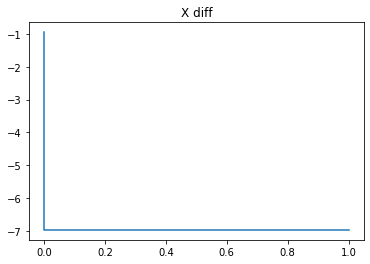

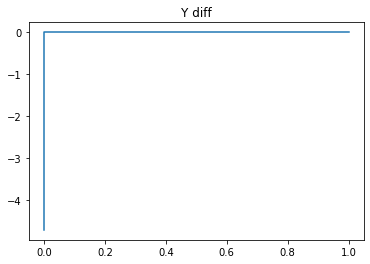

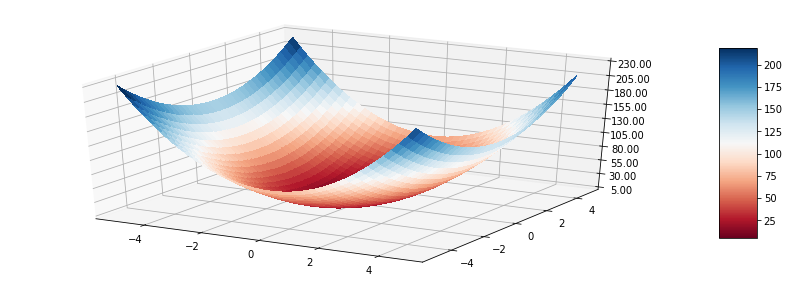

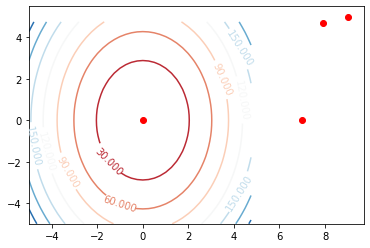

In [6]:
grad_output = sgd_multi(df,np.array([9, 5]))

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])

plotting(grad_output[2], grad_output[1], np.array([9, 5]))

__Adam__:

Minimum (x,y) from gradient descent: [-0.04492727 -0.00081058]
Number of gradient descent iterations: 100


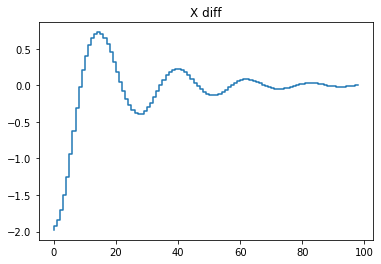

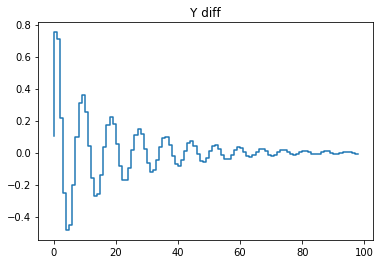

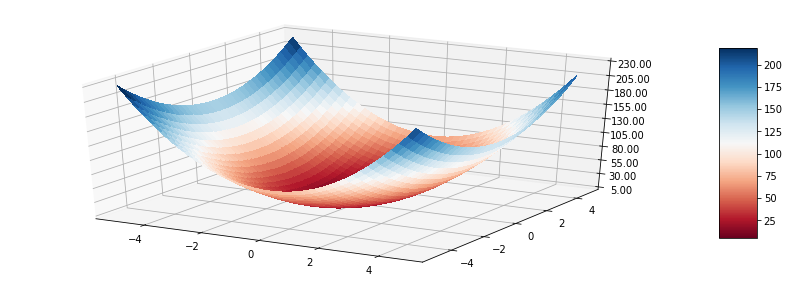

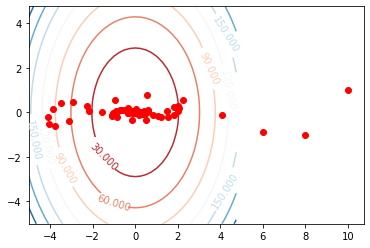

In [7]:
grad_output = adam(df, np.array([10, 1]), lr=2)

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])

plotting(grad_output[2], grad_output[1], np.array([10, 1]))